<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 3

### Problem 0 (3 points)

## Part 1: Line Search

### Problem 1.1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def f(x):
    c = 0.225
    return np.cos(2. * np.pi * (x + c) ** 2) * np.sin(5. * np.pi * np.log(x + c))

In [2]:
def line_search(h, a, b, c, width, show=False):
    my_triple = (a, b, c)
    counter = 0
    while (c-a)>width :
        assert a<b and b<c
        x_values = np.linspace(a, c, 10)
        y_values = np.full(shape=10, fill_value=counter, dtype=np.int)
        plt.plot(x_values, y_values, 'b')
        plt.plot(a, counter, 'bo', b, counter, 'bo', c, counter, 'bo')
        counter = counter + 1
        if ((b-a) > (c-b)):
            z = (a+b)/2
            if (h(z)>h(b)):
                a = z
            else:
                c = b
                b = z
            x_values = np.linspace(a, c, 10)
            y_values = np.full(shape=10, fill_value=counter, dtype=np.int)
            plt.plot(x_values, y_values, 'b')    
            plt.plot(a, counter, 'bo', b, counter, 'bo', c, counter, 'bo')
        else:
            z = (b+c)/2
            if (h(z)>h(b)):
                c = z
            else:
                a = b
                b = z
            x_values = np.linspace(a, c, 10)
            y_values = np.full(shape=10, fill_value=counter, dtype=np.int)
            plt.plot(x_values, y_values, 'b')
            plt.plot(a, counter, 'bo', b, counter, 'bo', c, counter, 'bo')
    plt.xlabel('Bracketing Triple')
    plt.ylabel('Iterations')
    print("Number of Iterations")
    print(counter)
    return b

Number of Iterations
18
alpha=0.176171875


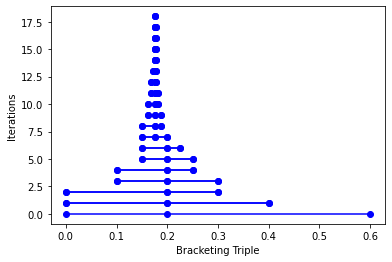

In [3]:
alpha = line_search(f, 0., 0.2, 0.6, 1.e-3)
print('alpha={}'.format(alpha))

### Problem 1.2 (Question Portion is Exam-Style)

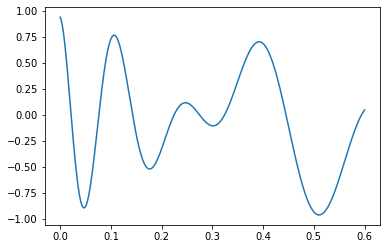

In [4]:
domain = np.linspace(0, .6, 300)
y_output = f(domain)
plt.plot(domain, y_output)

The line search does not converge to the minimum closest to a = 0. It converges to the minimum closest to the b value of the (a, b, c) bracketing triple. This is not the lowest minimum of the (a, c) range.

### Problem 1.3

Number of Iterations
16
alpha=0.510546875


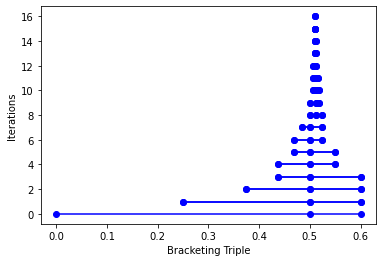

In [5]:
alpha = line_search(f, 0., 0.5, 0.6, 1.e-3)
print('alpha={}'.format(alpha))

## Part 2: Finding Zeros

### Problem 2.1 (Question (a) is Exam Style)

### Problem 2.2 (Exam Style)

In [6]:
apex_f = [0., 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

### Problem 2.3 (Exam Style)

### Problem 2.4

In [7]:
apex_d = [0.02, 0.08, 0.13, 0.2, 0.28, 0.35, 0.45, 0.57]

## Part 3: Steepest Descent 

In [8]:
def rosenbrock(u):
    u = np.array(u)
    y = 100. * (u[1] - u[0] ** 2) ** 2 + (1. - u[0]) ** 2
    gradient = np.array([400. * (u[0] ** 3 - u[0] * u[1]) + 2. * u[0] - 2.,
                         200. * (u[1] - u[0] ** 2)])
    hessian = np.array([[1200. * u[0] ** 2 - 400. * u[1] + 2., -400. * u[0]],
                        [-400. * u[0], 200.]])
    return y, gradient, hessian


In [9]:
u_0, u_star = np.array([-2.0, -2.0]), np.array([1.0, 1.0])

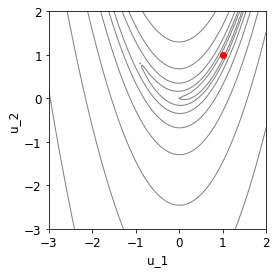

In [10]:
def show_history(history, u_star):
    n_grid = 101
    if len(history) == 0:
        span = np.linspace(-3., 2., n_grid)
        u = 2 * [span]
    else:
        h, u = [], []
        for i in range(2):
            hi = [item[0][i] for item in history]
            h.append(hi)
            u.append(np.linspace(min(-3., np.floor(np.min(hi) - 1.0)),
                                 np.ceil(max(3., np.max(hi) + 1.0)), n_grid))

    y = np.array([[rosenbrock(np.array([a, b]))[0] for a in u[0]] for b in u[1]])
    levels = np.logspace(0.01, 5, num=10)

    fs = 12
    _, ax = plt.subplots(1, 1)
    plt.contour(u[0], u[1], y, levels, colors='grey', linewidths=1)
    if len(history) > 0:
        plt.plot(h[0], h[1])
        plt.plot(h[0][0], h[1][0], 'bo')
    plt.plot(u_star[0], u_star[1], 'ro')
    ax.set_aspect(1)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel('u_1', fontsize=fs)
    plt.ylabel('u_2', fontsize=fs)
    if len(history) > 0:
        plt.title('{} steps'.format(len(history) - 1), fontsize=fs)
    plt.show()

    if len(history) > 0:
        plt.figure()
        plt.semilogy([item[1] for item in history])
        plt.xticks(fontsize=fs)
        plt.yticks(fontsize=fs)
        plt.xlabel('iteration', fontsize=fs)
        plt.ylabel('h(u)', fontsize=fs)
        plt.show()

show_history([], u_star)

In [11]:
from scipy import optimize


def complete_line_search(h, epsilon=1.e-8):
    outcome = optimize.minimize_scalar(h, (0., 1.e-4), tol=epsilon)
    if outcome['success']:
        return outcome['x'], outcome['fun']
    else:
        print('Line search failed:', outcome['message'])
        return None, None

In [12]:
def descent(function, u_0, step, delta=1.e-4, max_iterations=1000,
            record=True):
    found = False
    if record:
        hist = []
    u = u_0.copy()
    for k in range(max_iterations):
        y, g, H = function(u)
        if record:
            hist.append((u.copy(), y.copy()))
        if np.linalg.norm(g) == 0.:
            found = True
            break
        old_u = u.copy()
        u, y = step(function, u, g, H)
        if np.linalg.norm(u - old_u) < delta:
            found = True
            break
    if not found:
        print('Warning: maximum number of iterations exceeded')
    if record:
        hist.append((u.copy(), y.copy()))
        return u, y, hist
    else:
        return u, y

### Problem 3.1

### Problem 3.2 (Exam Style)

### Problem 3.3

### Problem 3.4 (Exam Style)